# IN_SYS - SW13 Exercise 1

## Tokenizers

In [131]:
# !pip install tiktoken
# !pip install dotenv

### Tokenization library for OpenAI models  

In this case we don't need access to OpenAI

In [136]:
import tiktoken

# Text example
text = "Die Hochschule Luzern – Technik & Architektur lehrt, forscht, entwickelt und verbindet seit über 60 Jahren.  "

# Initialize tokenizer for a specific OpenAI model
tokenizer = tiktoken.encoding_for_model("gpt-4")

# Tokenize the input text
token_ids = tokenizer.encode(text)

# Decode tokens back into text
tokens = tokenizer.decode(token_ids)

# Display results
print("Original Text:")
print(text)
print("\nToken IDs")
print(token_ids)
print("\nNumber of Tokens:")
print(len(tokens))

# Explanation of tokens with their corresponding text
print("\nToken Breakdown:")
for token_id in token_ids:
    token = tokenizer.decode([token_id])
    print(f"Token ID: {token_id} -> Token: '{token}'")

Original Text:
Die Hochschule Luzern – Technik & Architektur lehrt, forscht, entwickelt und verbindet seit über 60 Jahren.  

Token IDs
[18674, 68875, 21740, 1130, 82739, 944, 1389, 7146, 1609, 612, 9683, 635, 5964, 324, 514, 71, 3423, 11, 75751, 14244, 11, 81229, 3903, 2073, 2807, 7821, 295, 42588, 14104, 220, 1399, 46606, 13, 256]

Number of Tokens:
109

Token Breakdown:
Token ID: 18674 -> Token: 'Die'
Token ID: 68875 -> Token: ' Hoch'
Token ID: 21740 -> Token: 'sch'
Token ID: 1130 -> Token: 'ule'
Token ID: 82739 -> Token: ' Luz'
Token ID: 944 -> Token: 'ern'
Token ID: 1389 -> Token: ' –'
Token ID: 7146 -> Token: ' Techn'
Token ID: 1609 -> Token: 'ik'
Token ID: 612 -> Token: ' &'
Token ID: 9683 -> Token: ' Arch'
Token ID: 635 -> Token: 'ite'
Token ID: 5964 -> Token: 'kt'
Token ID: 324 -> Token: 'ur'
Token ID: 514 -> Token: ' le'
Token ID: 71 -> Token: 'h'
Token ID: 3423 -> Token: 'rt'
Token ID: 11 -> Token: ','
Token ID: 75751 -> Token: ' fors'
Token ID: 14244 -> Token: 'cht'
Token I

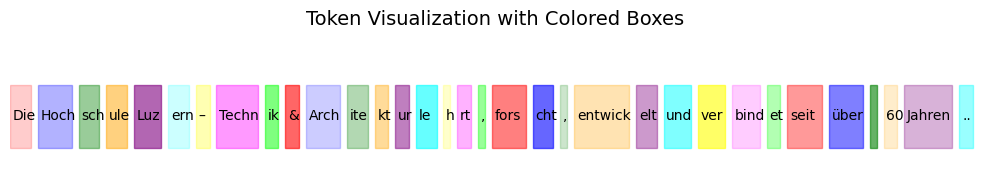

In [137]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tiktoken import encoding_for_model

# Text to tokenize
text = "Die Hochschule Luzern – Technik & Architektur lehrt, forscht, entwickelt und verbindet seit über 60 Jahren.."

# Initialize tokenizer for a specific OpenAI model
tokenizer = encoding_for_model("gpt-4")

# Tokenize the input text
token_ids = tokenizer.encode(text)

# Decode tokens back into text pieces
tokens = [tokenizer.decode([token_id]) for token_id in token_ids]

# Define colors and opacities for the tokens
colors = ["red", "blue", "green", "orange", "purple", "cyan", "yellow", "magenta", "lime"]
opacities = [0.2 + 0.1 * (i % 5) for i in range(len(tokens))]  # Alternating opacities

# Plot settings
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis("off")

# Start x-coordinate for placing text
x_pos = 0

# Font size for visualization
font_size = 10

# Add tokens with colored backgrounds
for i, token in enumerate(tokens):
    # Measure token width
    token_width = len(token) * 0.05  # Approximation for text width

    # Add colored background for the token
    rect = patches.Rectangle((x_pos, 0), token_width, 1, color=colors[i % len(colors)], alpha=opacities[i])
    ax.add_patch(rect)

    # Add the token text on top of the background
    ax.text(x_pos + 0.02, 0.5, token.strip(), fontsize=font_size, va="center", ha="left", color="black")

    # Update x-coordinate for next token
    x_pos += token_width + 0.05  # Add spacing between tokens

# Adjust the plot limits
ax.set_xlim(0, x_pos)
ax.set_ylim(-0.5, 1.5)

# Display the plot
plt.title("Token Visualization with Colored Boxes", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### OpenAI Model gpt-4 has a different vocabulary from gpt-5

In [138]:
import tiktoken

text = "I love my school"

openai4_enc = tiktoken.encoding_for_model("gpt-4")
openai5_enc = tiktoken.encoding_for_model("gpt-5")

openai4_tokens = openai4_enc.encode(text)
openai5_tokens = openai5_enc.encode(text)

print(f"OpenAI GPT4: {openai4_tokens}")
print(f"OpenAI GPT5: {openai5_tokens}")

OpenAI GPT4: [40, 3021, 856, 2978]
OpenAI GPT5: [40, 3047, 922, 3474]


### Using one model to decode the token IDs from a different model's vocabulary will not work

In [22]:
tokens = [40, 3021, 856, 2978]
text = openai5_enc.decode(tokens)
print(text)

Ioneyე�vol


### Tokenization of one word can yield different tokens (beware of context)

In [139]:
text = ["Jahren", " Jahren"]

for word in text:
    tokenizer = tiktoken.encoding_for_model("gpt-4")
    tokens = tokenizer.encode(word)

    print(f"\nTokenization of '{word}':")
    for token_id in tokens:
        token_text = tokenizer.decode([token_id])
        print(f"  {token_id:6} -> {repr(token_text)}")

    if len(tokens) == 1:
        print(f"{word} is ONE token: {tokens[0]}")
    elif len(tokens) == 2:
        print(f"{word} is TWO tokens: {tokens[0]} + {tokens[1]}")
        part1 = tokenizer.decode([tokens[0]])
        part2 = tokenizer.decode([tokens[1]])
        print(f"  Parts: '{part1}' + '{part2}' = '{part1}{part2}'")


Tokenization of 'Jahren':
      41 -> 'J'
   21865 -> 'ahren'
Jahren is TWO tokens: 41 + 21865
  Parts: 'J' + 'ahren' = 'Jahren'

Tokenization of ' Jahren':
   46606 -> ' Jahren'
 Jahren is ONE token: 46606


### Vocabulary will also include foreign scripts for multilingual tokenization

In [140]:
import tiktoken

tokenizer = tiktoken.encoding_for_model("gpt-4")

print("How tokenization handles cyrillic:")
print("="*70)

# Modern tokenizers are SMART about Cyrillic
cyrillic_examples = [
    "новый",      # new
    "нового",     # new (genitive)
    "новые",      # new (plural)
    "новейший",   # newest
]

print("Russian adjective variations:")
for word in cyrillic_examples:
    tokens = tokenizer.encode(word)
    token_texts = [tokenizer.decode([t]) for t in tokens]
    
    print(f"\n'{word:15}' → {tokens}")
    print(f"  Parts: {token_texts}")
    
    # Look for shared morphemes
    if len(tokens) > 1:
        for token_text in token_texts:
            if "нов" in token_text.lower():
                print(f"  Found shared root 'нов' (new)")

How tokenization handles cyrillic:
Russian adjective variations:

'новый          ' → [47805, 35723]
  Parts: ['нов', 'ый']
  Found shared root 'нов' (new)

'нового         ' → [47805, 22885]
  Parts: ['нов', 'ого']
  Found shared root 'нов' (new)

'новые          ' → [47805, 51736]
  Parts: ['нов', 'ые']
  Found shared root 'нов' (new)

'новейший       ' → [47805, 21708, 30480, 12415]
  Parts: ['нов', 'ей', 'ши', 'й']
  Found shared root 'нов' (new)
